In [ ]:
# LSTM(Long Short-Term Memory) 모델을 구현하는 예제 코드입니다.
# 이 코드는 IMDB 영화 리뷰 감정 분석 데이터셋을 사용하여, LSTM 모델을 학습하고 감정을 예측하는 과정

LSTM

# 영화 감정분석

## 라이브러리

In [ ]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 하이퍼파라미터

In [ ]:
# 하이퍼파라미터 설정
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

## 데이터 로드

In [ ]:
# 데이터 로드 및 전처리:

# imdb.load_data() 함수를 사용해 IMDB 영화 리뷰 데이터셋을 로드합니다.
#  이 데이터셋은 이진 분류 문제로, 영화 리뷰가 긍정인지 부정인지 예측하는 문제입니다.
# 각 리뷰는 단어의 시퀀스로 표현되며, 최대 10,000개의 상위 단어만 사용합니다.
# 리뷰의 길이가 다르므로, pad_sequences를 사용하여 각 리뷰를 100개의 단어로 맞춥니다.
# 길이가 100보다 짧은 리뷰는 패딩을 추가하고, 길면 자릅니다.

In [ ]:
# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

## 시퀀스 패딩

In [ ]:
# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

## 모델링

### 모델 정의

In [ ]:
# LSTM 모델 정의:

# Embedding 층: 입력 단어를 고차원 밀집 벡터로 변환합니다. 입력 단어의 개수는 최대 10,000개이고, 각 단어는 32차원의 벡터로 변환됩니다.
# LSTM 층: 100개의 유닛을 가진 LSTM(Long Short-Term Memory) 층입니다. return_sequences=False로 설정하여, 마지막 출력만 반환하여 다음 층으로 전달합니다.
# 출력층(Dense): 감정이 긍정인지 부정인지 예측하는 이진 분류 문제이므로, 1개의 노드와 시그모이드(Sigmoid) 활성화 함수를 사용합니다.

In [ ]:
# LSTM 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# LSTM 층: 100개의 유닛을 사용
model.add(LSTM(100, return_sequences=False))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))


### 모델 컴파일

In [ ]:
# 손실 함수로 binary_crossentropy를 사용하며, 이진 분류 문제에 적합한 손실 함수입니다.
# 최적화 방법으로 Adam을 사용하여 경사 하강법을 최적화합니다.
# 성능 평가 지표로 **accuracy(정확도)**를 사용합니다.

In [ ]:
# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습

In [ ]:
# 5 에포크 동안 학습하며, 배치 크기 64로 설정하여 학습을 진행합니다.
# 학습 중간에 테스트 데이터를 사용해 검증도 수행합니다.

In [ ]:

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - accuracy: 0.6519 - loss: 0.5841 - val_accuracy: 0.8492 - val_loss: 0.3445
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.8890 - loss: 0.2799 - val_accuracy: 0.8513 - val_loss: 0.3435
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 165ms/step - accuracy: 0.9175 - loss: 0.2127 - val_accuracy: 0.8416 - val_loss: 0.3910
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - accuracy: 0.9373 - loss: 0.1657 - val_accuracy: 0.8419 - val_loss: 0.4042
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.9570 - loss: 0.1261 - val_accuracy: 0.8282 - val_loss: 0.5269


### 모델 평가

In [ ]:
# 학습이 완료되면 테스트 데이터셋에서 모델 성능을 평가하고 정확도(accuracy)를 출력합니다.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8276 - loss: 0.5309
Test Accuracy: 82.82%


## 예측

In [ ]:
# 학습된 모델을 사용해 테스트 데이터에 대한 예측값을 생성합니다.
# 결과 출력
# 모델 학습이 완료되면 다음과 같은 정보가 출력됩니다:

# Test Accuracy: 테스트 데이터셋에서의 정확도를 퍼센트로 표시합니다.

In [ ]:
# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step


## 종합

In [ ]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 하이퍼파라미터 설정
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# LSTM 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# LSTM 층: 100개의 유닛을 사용
model.add(LSTM(100, return_sequences=False))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)


# 주가 예측 사례

## s전자

In [ ]:
# 코드 설명
# 데이터 로드: yfinance를 사용해 삼성전자(005930.KS) 일별 종가 데이터를 가져옵니다.
# 데이터 전처리: MinMaxScaler로 종가 데이터를 정규화하고, 훈련 및 테스트 세트를 8:2 비율로 나눕니다.
# 데이터셋 생성: 시퀀스 길이를 60으로 설정해 훈련과 테스트용 시퀀스 데이터셋을 생성합니다.
# LSTM 모델 구성: 두 개의 LSTM 레이어와 완전 연결 레이어로 모델을 구성하고, adam 옵티마이저와 평균 제곱 오차(MSE) 손실 함수를 사용해 컴파일합니다.
# 예측 및 역정규화: 예측 결과를 역정규화하여 실제 주가 단위로 변환합니다.
# 결과 시각화: 훈련 데이터와 테스트 데이터, 예측된 데이터를 시각화하여 모델 성능을 평가합니다.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기 (005930.KS는 삼성전자의 티커)
df = yf.download('005930.KS', start='2020-01-01', end='2023-12-31')
df = df[['Close']]  # 종가만 사용

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len - 60:]

# 3. LSTM 모델 입력 데이터 생성
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 4. LSTM 모델 구성 및 학습
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

# 5. 예측 및 결과 평가
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

y_test_scaled = scaler.inverse_transform([y_test])

# 6. 결과 시각화
train_data = df[:train_data_len]
valid_data = df[train_data_len:]
valid_data['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(valid_data['Close'], label='Actual Price')
plt.plot(valid_data['Predictions'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()


향후 60일간 주가를 예측하는 코드

In [ ]:
# 코드 설명
# 마지막 60일 데이터 준비: last_60_days는 현재 데이터에서 가장 최근 60일의 데이터를 가져옵니다.
# 예측 반복: 각 미래 날짜의 주가를 예측하고 이를 last_60_days에 추가해, 다음 날 예측 시 최신 데이터를 사용할 수 있도록 합니다.
# 역정규화: MinMaxScaler의 inverse_transform을 사용해 원래 가격 단위로 변환합니다.
# 미래 예측 시각화: 원래 데이터와 향후 60일 예측값을 시각화해 예측 추세를 확인합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

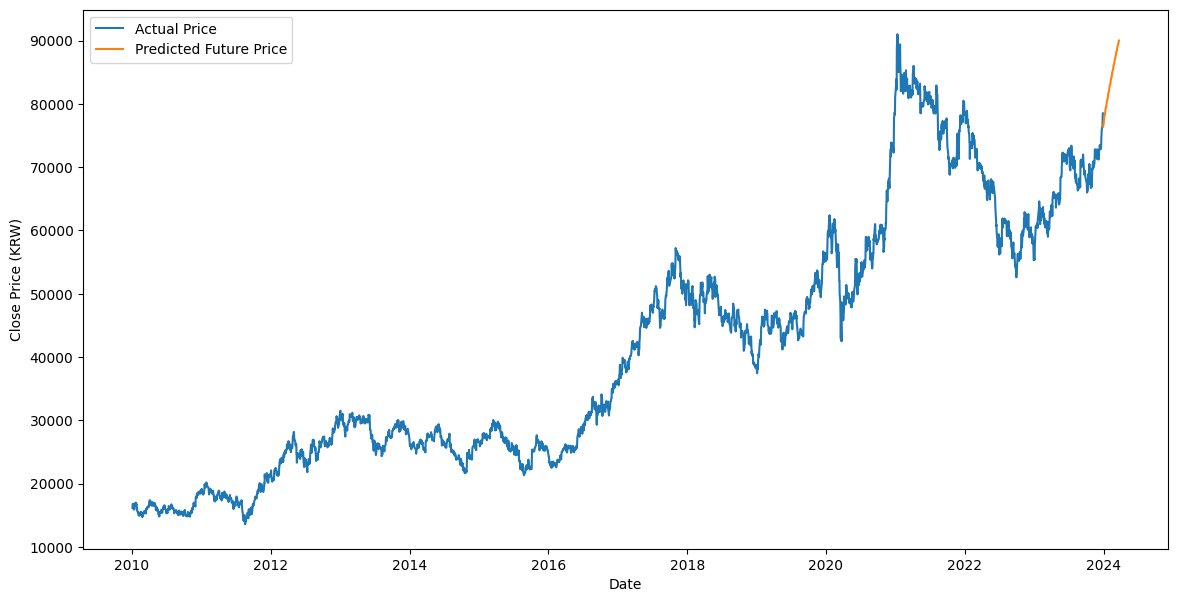

In [ ]:
# 5.향후 60일 주가 예측
future_days = 60
last_60_days = scaled_data[-60:]  # 마지막 60일 데이터 가져오기
predicted_future_prices = []

for _ in range(future_days):
    X_future = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    future_price = model.predict(X_future)
    predicted_future_prices.append(future_price[0, 0])

    # 예측값을 추가하여 다음 입력 데이터 준비
    last_60_days = np.append(last_60_days, future_price)
    last_60_days = last_60_days[1:]  # 새로운 60일 데이터 유지

# 예측한 값 역정규화
predicted_future_prices = np.array(predicted_future_prices).reshape(-1, 1)
predicted_future_prices = scaler.inverse_transform(predicted_future_prices)

# 6.예측 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Price')
plt.plot(
    pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B'),
    predicted_future_prices, label='Predicted Future Price'
)
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()


pykrx 이용 : 2.24.11.13 주가 

Index(['시가', '고가', '저가', '종가', '거래량'], dtype='object')
Epoch 1/10


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1198
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0073
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0056
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0046
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0042
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0044
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0042
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0038
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0037
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0041
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


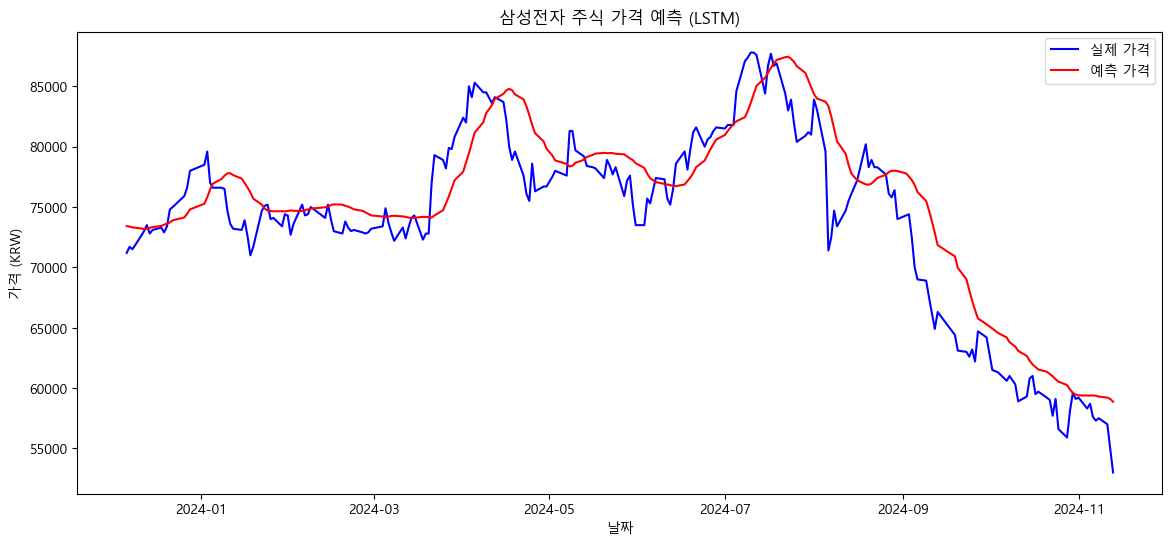

In [12]:
from pykrx import stock
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 삼성전자 주식 데이터 가져오기
ticker = "005930"  # 삼성전자 종목 코드
start_date = "20200101"  # 시작 날짜 (형식: 'YYYYMMDD')
end_date = "20241113"    # 종료 날짜 (형식: 'YYYYMMDD')
samsung_data = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)

# 컬럼 확인
print(samsung_data.columns)

# LSTM 데이터 전처리
# '종가' 컬럼 사용
if '종가' not in samsung_data.columns:
    print("데이터에 '종가' 컬럼이 없습니다. 사용 가능한 컬럼:", samsung_data.columns)
else:
    data = samsung_data[['종가']]  # '종가' 컬럼만 사용

    # 데이터 정규화
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # LSTM을 위한 데이터셋 준비
    # 60일의 데이터를 사용하여 다음 날 주식 가격 예측
    def create_dataset(data, time_step=60):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    # 학습용 및 테스트용 데이터셋 생성
    time_step = 60
    X, y = create_dataset(scaled_data, time_step)

    # LSTM에 맞게 데이터 형태 변경 [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # 데이터 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # LSTM 모델 생성
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # 출력층

    # 모델 컴파일 및 학습
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # 주식 가격 예측
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # 실제 값과 예측 값 비교 그래프 출력
    plt.figure(figsize=(14, 6))
    plt.plot(samsung_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='실제 가격')
    plt.plot(samsung_data.index[-len(y_test):], predictions, color='red', label='예측 가격')
    plt.title('삼성전자 주식 가격 예측 (LSTM)')
    plt.xlabel('날짜')
    plt.ylabel('가격 (KRW)')
    plt.legend()
    plt.show()


Epoch 1/50


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0250
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0020
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0016
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0020
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0017
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0018
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0012
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0013
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0014
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0011
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0011
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0011
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0010
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 8.8943e-04
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 9.2643e-04
Epoch 1

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
향후 1일 예측된 주식 가격: 53352.07 KRW
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━

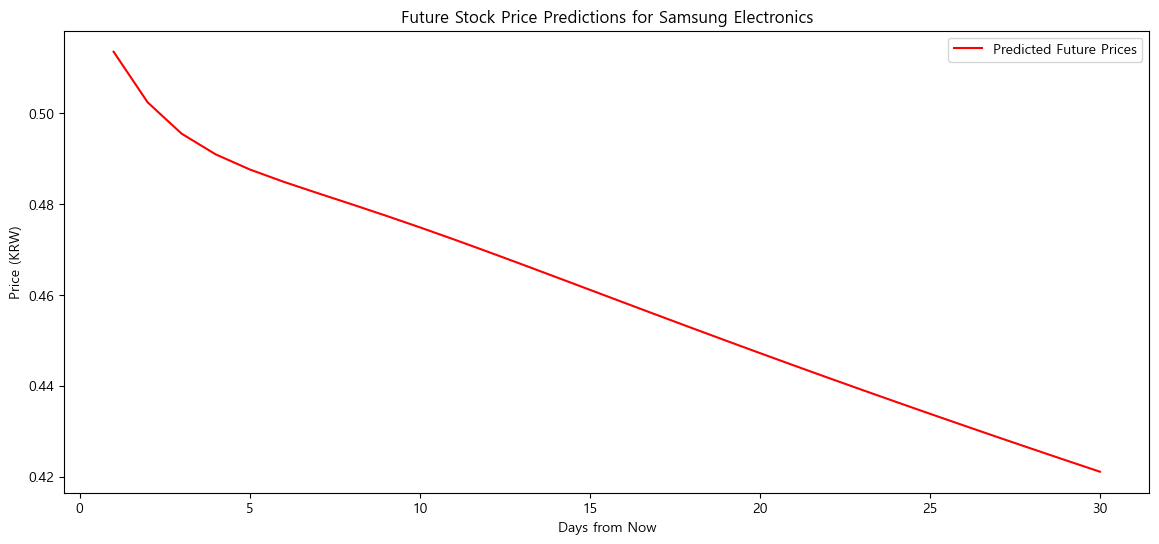

In [11]:
from pykrx import stock
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 삼성전자 주식 데이터 가져오기
ticker = "005930"  # 삼성전자 종목 코드
start_date = "20100101"  # 시작 날짜 (형식: 'YYYYMMDD')
end_date = "20241113"    # 종료 날짜 (형식: 'YYYYMMDD')
samsung_data = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)

# '종가' 컬럼만 사용
data = samsung_data[['종가']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# LSTM을 위한 데이터셋 준비
# 60일의 데이터를 사용하여 다음 날 주식 가격 예측
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 학습용 및 테스트용 데이터셋 생성
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# LSTM에 맞게 데이터 형태 변경 [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # 출력층

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 마지막 60일 데이터를 이용해 향후 주가 예측
last_60_days = samsung_data[['종가']].values[-60:]  # 마지막 60일 종가 데이터
last_60_days_scaled = scaler.transform(last_60_days)  # 정규화

# 모델에 맞게 데이터 형태 변경 [samples, time steps, features]
last_60_days_scaled = last_60_days_scaled.reshape((1, 60, 1))

# 향후 1일 예측 (1일 후 종가)
predicted_price = model.predict(last_60_days_scaled)
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))  # 역정규화

print(f"향후 1일 예측된 주식 가격: {predicted_price[0][0]:.2f} KRW")

# 향후 n일 예측 (예: 30일 예측)
future_days = 30
predictions = []
current_input = last_60_days_scaled

for _ in range(future_days):
    predicted_price = model.predict(current_input)
    predictions.append(predicted_price[0][0])
    # 예측값을 다음 입력으로 사용 (연속적으로 예측)
    current_input = np.append(current_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# 예측된 주식 가격 출력
plt.figure(figsize=(14, 6))
plt.plot(range(1, future_days + 1), predictions, color='red', label='Predicted Future Prices')
plt.title('Future Stock Price Predictions for Samsung Electronics')
plt.xlabel('Days from Now')
plt.ylabel('Price (KRW)')
plt.legend()
plt.show()


데이터 수집기간 변경

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0774
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0164
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0076
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0072
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0056
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0059
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0055
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0049
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0042
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0054
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0048
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0041
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0044
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0044
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0047
Epoc

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
향후 1일 예측된 주식 가격: 55345.48 KRW
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━

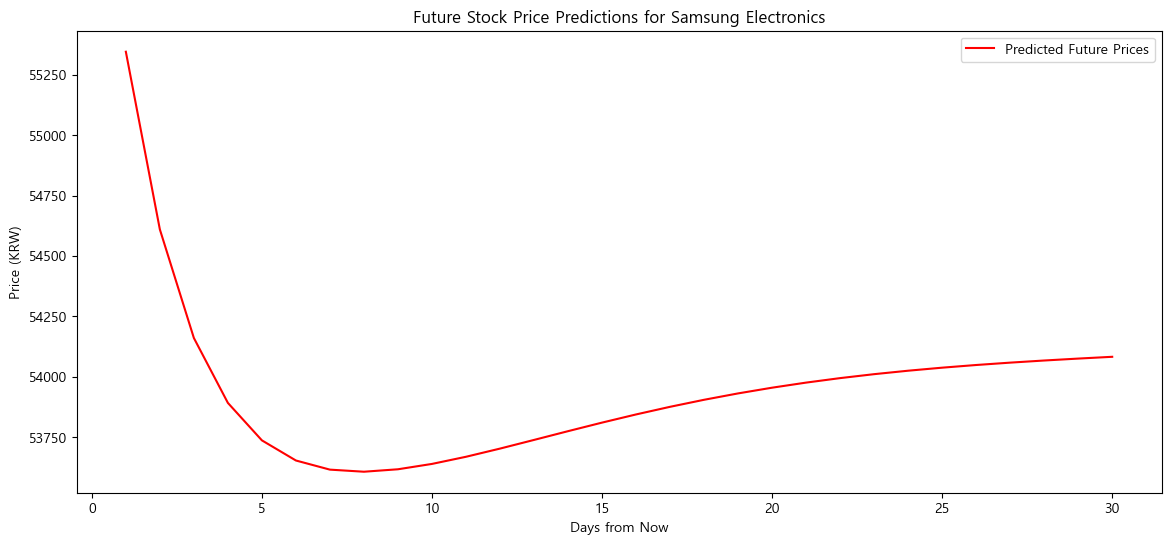

In [15]:
from pykrx import stock
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 삼성전자 주식 데이터 가져오기
ticker = "005930"  # 삼성전자 종목 코드
start_date = "20220101"  # 시작 날짜 (형식: 'YYYYMMDD')
end_date = "20241113"    # 종료 날짜 (형식: 'YYYYMMDD')
samsung_data = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)

# '종가' 컬럼만 사용
data = samsung_data[['종가']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# LSTM을 위한 데이터셋 준비
# 60일의 데이터를 사용하여 다음 날 주식 가격 예측
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 학습용 및 테스트용 데이터셋 생성
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# LSTM에 맞게 데이터 형태 변경 [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # 출력층

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 마지막 60일 데이터를 이용해 향후 주가 예측
last_60_days = samsung_data[['종가']].values[-60:]  # 마지막 60일 종가 데이터
last_60_days_scaled = scaler.transform(last_60_days)  # 정규화

# 모델에 맞게 데이터 형태 변경 [samples, time steps, features]
last_60_days_scaled = last_60_days_scaled.reshape((1, 60, 1))

# 향후 1일 예측 (1일 후 종가)
predicted_price = model.predict(last_60_days_scaled)
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))  # 역정규화

print(f"향후 1일 예측된 주식 가격: {predicted_price[0][0]:.2f} KRW")

# 향후 n일 예측 (예: 30일 예측)
future_days = 30
predictions = []
current_input = last_60_days_scaled

for _ in range(future_days):
    predicted_price = model.predict(current_input)
    predictions.append(predicted_price[0][0])  # 예측값을 리스트에 추가
    # 예측값을 다음 입력으로 사용 (연속적으로 예측)
    current_input = np.append(current_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# 예측값을 역정규화하여 실제 가격으로 변환
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 예측된 주식 가격 출력
plt.figure(figsize=(14, 6))
plt.plot(range(1, future_days + 1), predictions, color='red', label='Predicted Future Prices')
plt.title('Future Stock Price Predictions for Samsung Electronics')
plt.xlabel('Days from Now')
plt.ylabel('Price (KRW)')  # Y축에 가격 단위 표시
plt.legend()
plt.show()


## kospi 향후 30일

Epoch 1/50


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2268
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0338
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0182
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0122
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0088
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0103
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0100
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0089
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0108
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0095
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0100
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0089
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0077
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0083
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0075
Epoch 16/50
10/

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
향후 1일 예측된 KOSPI 지수 가격: 2523.73 KRW
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━

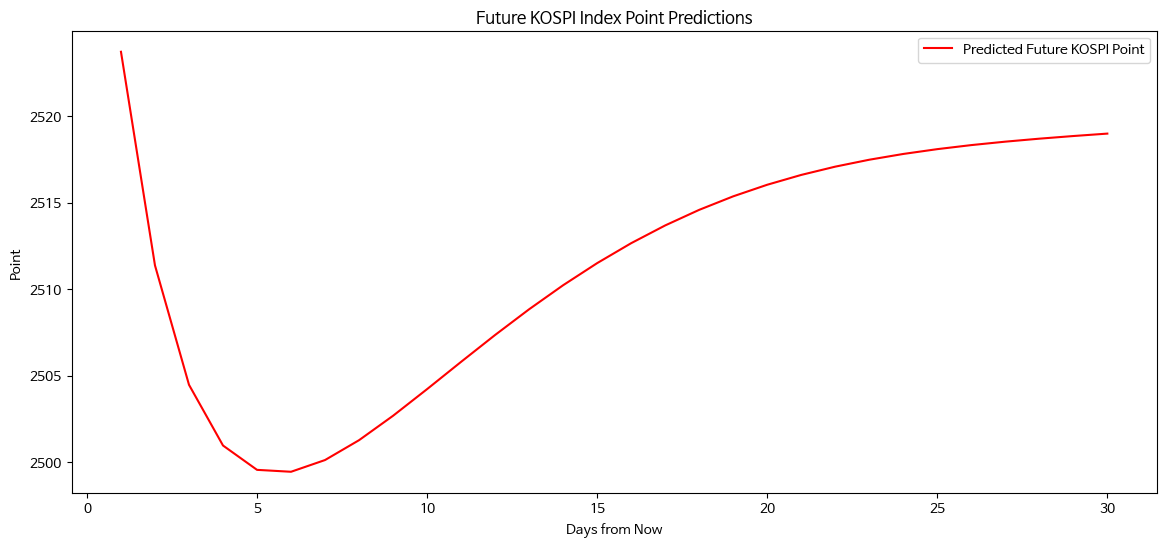

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# KOSPI 지수 데이터 가져오기
ticker = "1001"  # KOSPI 지수 종목 코드 1001
start_date = "20230101"  # 시작 날짜 (형식: 'YYYYMMDD')
end_date = "20241113"    # 종료 날짜 (형식: 'YYYYMMDD')
kospi_data = stock.get_index_ohlcv_by_date(start_date, end_date, ticker)

# '종가' 컬럼만 사용
data = kospi_data[['종가']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# LSTM을 위한 데이터셋 준비
# 60일의 데이터를 사용하여 다음 날 주식 가격 예측
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 학습용 및 테스트용 데이터셋 생성
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# LSTM에 맞게 데이터 형태 변경 [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터 학습용과 테스트용으로 분리 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # 출력층

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 마지막 60일 데이터를 이용해 향후 주가 예측
last_60_days = kospi_data[['종가']].values[-60:]  # 마지막 60일 종가 데이터
last_60_days_scaled = scaler.transform(last_60_days)  # 정규화

# 모델에 맞게 데이터 형태 변경 [samples, time steps, features]
last_60_days_scaled = last_60_days_scaled.reshape((1, 60, 1))

# 향후 1일 예측 (1일 후 종가)
predicted_price = model.predict(last_60_days_scaled)
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))  # 역정규화

print(f"향후 1일 예측된 KOSPI 지수 가격: {predicted_price[0][0]:.2f} KRW")

# 향후 n일 예측 (예: 30일 예측)
future_days = 30
predictions = []
current_input = last_60_days_scaled

for _ in range(future_days):
    predicted_price = model.predict(current_input)
    predictions.append(predicted_price[0][0])  # 예측값을 리스트에 추가
    # 예측값을 다음 입력으로 사용 (연속적으로 예측)
    current_input = np.append(current_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# 예측값을 역정규화하여 실제 가격으로 변환
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 예측된 KOSPI 지수 출력
plt.figure(figsize=(14, 6))
plt.plot(range(1, future_days + 1), predictions, color='red', label='Predicted Future KOSPI Point')
plt.title('Future KOSPI Index Point Predictions')
plt.xlabel('Days from Now')
plt.ylabel('Point')  # Y축에 가격 단위 표시
plt.legend()
plt.show()


## 코스닥 주가

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1630
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0063
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


<ipython-input-1-9aac7b3fb44c>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predictions


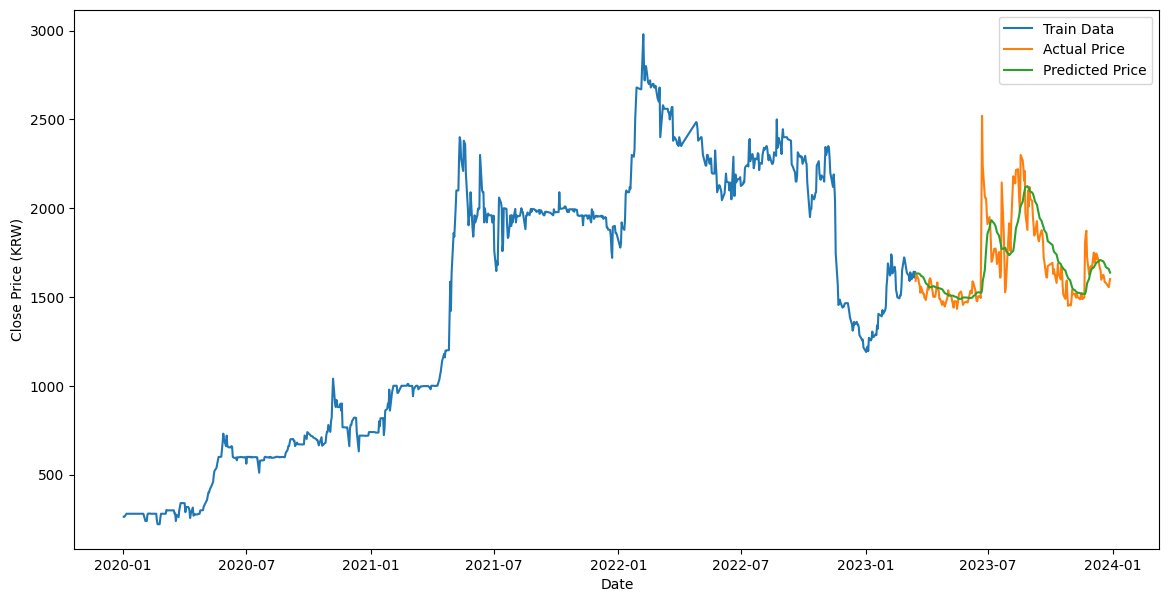

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. 주가 데이터 가져오기
df = yf.download('084440.KQ', start='2020-01-01', end='2023-12-31', actions=False)
df = df[['Close']]  # 종가만 사용


# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len - 60:]

# 3. LSTM 모델 입력 데이터 생성
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 4. LSTM 모델 구성 및 학습
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

# 5. 예측 및 결과 평가
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

y_test_scaled = scaler.inverse_transform([y_test])

# 6. 결과 시각화
train_data = df[:train_data_len]
valid_data = df[train_data_len:]
valid_data['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(valid_data['Close'], label='Actual Price')
plt.plot(valid_data['Predictions'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━

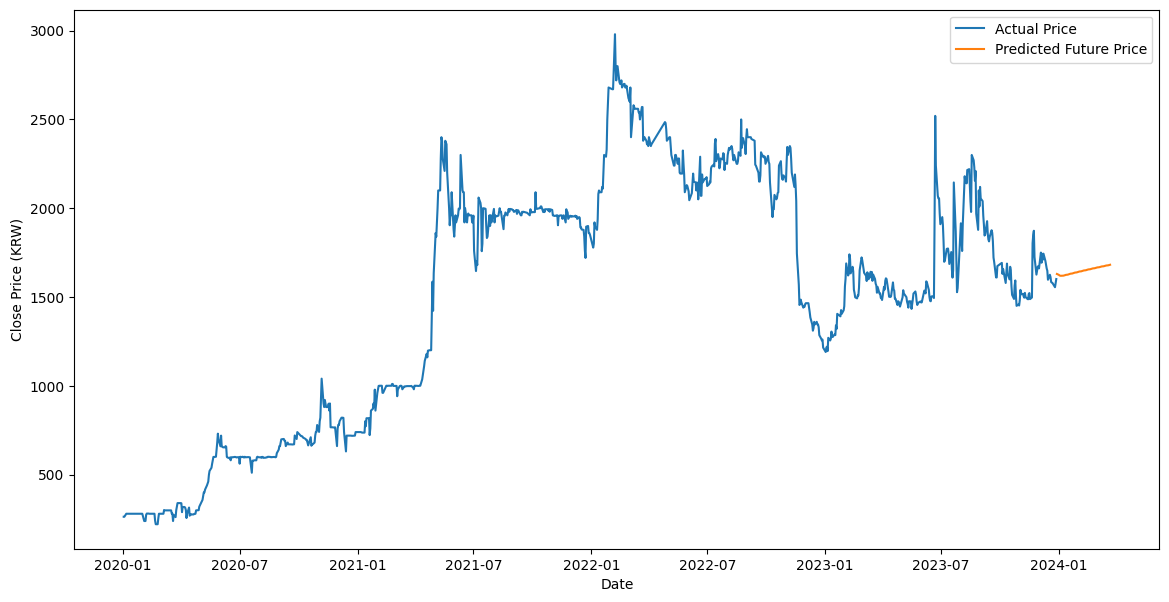

In [ ]:
# 5.향후 60일 주가 예측
future_days = 60
last_60_days = scaled_data[-60:]  # 마지막 60일 데이터 가져오기
predicted_future_prices = []

for _ in range(future_days):
    X_future = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    future_price = model.predict(X_future)
    predicted_future_prices.append(future_price[0, 0])

    # 예측값을 추가하여 다음 입력 데이터 준비
    last_60_days = np.append(last_60_days, future_price)
    last_60_days = last_60_days[1:]  # 새로운 60일 데이터 유지

# 예측한 값 역정규화
predicted_future_prices = np.array(predicted_future_prices).reshape(-1, 1)
predicted_future_prices = scaler.inverse_transform(predicted_future_prices)

# 6.예측 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Price')
plt.plot(
    pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B'),
    predicted_future_prices, label='Predicted Future Price'
)
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()


 GRU 모델

In [ ]:
# ■ GRU는 LSTM과 비교하여 게이트 수를 줄이고 메모리 셀 없이 은닉 상태를 직접 관리하는 방식으로, 더 간단한 구조로 설계되었습니다.
# ■ GRU는 입력 게이트와 망각 게이트의 역할을 업데이트 게이트와 리셋 게이트로 통합하여 정보 흐름을 제어합니다.

In [ ]:
# 코드 설명
# 데이터 수집: yfinance를 이용해 삼성전자 일별 주가 데이터를 가져오고, 종가만 선택해 분석에 사용합니다.
# 데이터 전처리: 주가 데이터를 MinMaxScaler를 이용해 0~1 범위로 스케일링합니다.
# GRU 모델 구성: GRU 레이어를 쌓아 모델을 구성하고, 최종 예측을 위해 Dense 레이어를 추가합니다.
# 모델 학습: 학습 데이터를 통해 GRU 모델을 학습합니다.
# 예측: 마지막 30일의 데이터를 기반으로 주가를 예측합니다.
# 시각화: 실제 주가와 예측 주가를 비교하여 예측 성능을 시각적으로 확인합니다.

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0514 - val_loss: 0.0015
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - val_loss: 5.9955e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.7285e-04 - val_loss: 4.5990e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.6205e-04 - val_loss: 4.3600e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.1853e-04 - val_loss: 5.4236e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.0176e-04 - val_loss: 3.9494e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.8297e-04 - val_loss: 3.7907e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.5823e-04 - val_loss: 4.2788e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.1475e-04 - val_loss: 3.5520e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.9829e-04 - val_loss: 3.4277e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1618e-04 - val_loss: 3.3082e-0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

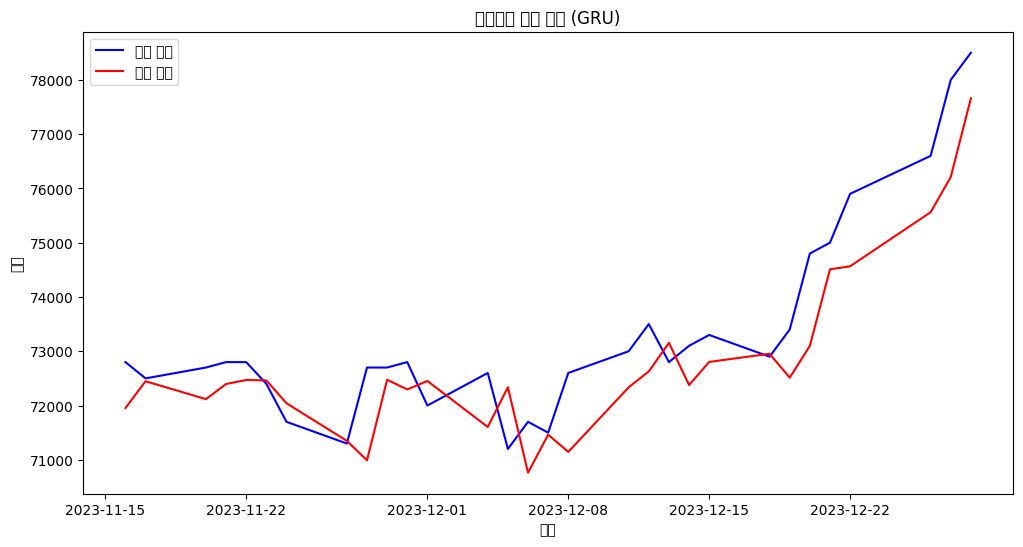

In [3]:
# 필요한 라이브러리 가져오기
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기
ticker = '005930.KS'  # 삼성전자 종목 코드
data = yf.download(ticker, start="2018-01-01", end="2024-01-01")  # 시작일과 종료일 설정
data = data[['Close']]  # 'Close' 열만 사용

# 2. 데이터 전처리 (MinMaxScaler를 사용해 스케일 조정)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 학습 데이터를 위한 데이터셋 준비
sequence_length = 60  # 60일 간의 데이터를 이용하여 다음 날 예측
X_train = []
y_train = []

for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # GRU 입력 형식에 맞게 reshape

# 3. GRU 모델 정의
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# 4. 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 5. 테스트 데이터 준비 및 예측
test_data = scaled_data[-(sequence_length + 30):]  # 마지막 30일 예측
X_test = []

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 예측 수행
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 원래 가격대로 변환

# 6. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-30:], data['Close'][-30:], color='blue', label='실제 가격')
plt.plot(data.index[-30:], predictions, color='red', label='예측 가격')
plt.title('삼성전자 주가 예측 (GRU)')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


In [ ]:
# 향후 300일 주가 예측

In [ ]:
# 필요한 라이브러리 가져오기
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# 한글 폰트 설정
plt.rc('font', family='NanumGothic')  # 시스템에 따라 폰트 이름이 다를 수 있음
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 1. 삼성전자 주가 데이터 가져오기
ticker = '005930.KS'  # 삼성전자 종목 코드
data = yf.download(ticker, start="2018-01-01", end="2024-01-01")  # 시작일과 종료일 설정
data = data[['Close']]  # 'Close' 열만 사용

# 2. 데이터 전처리 (MinMaxScaler를 사용해 스케일 조정)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 학습 데이터를 위한 데이터셋 준비
sequence_length = 60  # 60일 간의 데이터를 이용하여 다음 날 예측
X_train = []
y_train = []

for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # GRU 입력 형식에 맞게 reshape

# 3. GRU 모델 정의
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# 4. 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 5. 향후 300일 주가 예측
last_sequence = scaled_data[-sequence_length:]  # 마지막 60일 데이터를 가져옴
predicted_prices = []

for _ in range(300):  # 300일 예측
    X_test = np.reshape(last_sequence, (1, sequence_length, 1))
    predicted_price = model.predict(X_test)  # 예측
    predicted_prices.append(predicted_price[0, 0])  # 예측한 주가 추가
    
    # 예측한 값을 sequence에 추가하고, 가장 오래된 값 제거 (rolling window)
    last_sequence = np.append(last_sequence[1:], predicted_price[0, 0])

# 스케일 복원 (inverse transform)
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 6. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-30:], data['Close'][-30:], color='blue', label='실제 가격')  # 최근 30일 실제 가격
plt.plot(pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=300), predicted_prices, color='red', label='300일 예측 가격')
plt.title('삼성전자 주가 300일 예측 (GRU)')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()
